In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# TASK_1

Даны значения зарплат из выборки выпускников:
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
salarys = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [3]:
sum_ = 0
len_ = 0
for salary in salarys:
    sum_ += salary
    len_ += 1
mean_ = sum_ / len_
print(f'mean = {mean_}')

mean = 65.3


In [6]:
tmp = 0
for salary in salarys:
    tmp += (salary - mean_)**2
variance = tmp / len_
variance_1 = tmp / (len_ - 1)
stand_deviation = sqrt(variance)
print(f'variance = {variance}')
print(f'variance - 1 = {variance_1}')
print(f'standart deviation = {stand_deviation}')

variance = 950.11
variance - 1 = 1000.1157894736842
standart deviation = 30.823854398825596


In [7]:
print(f'mean = {mean_}, check = {salarys.mean()}, {mean_ == salarys.mean()}')
print(f'variance = {variance}, check = {salarys.var(ddof=0)}, {variance == salarys.var(ddof=0)}')
print(f'variance - 1 = {variance_1}, check = {salarys.var(ddof=1)}, {variance_1 == salarys.var(ddof=1)}')
print(f'standart deviation = {stand_deviation}, check = {salarys.std(ddof=0)}, {stand_deviation == salarys.std(ddof=0)}')

mean = 65.3, check = 65.3, True
variance = 950.11, check = 950.11, True
variance - 1 = 1000.1157894736842, check = 1000.1157894736842, True
standart deviation = 30.823854398825596, check = 30.823854398825596, True


# TASK_2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [8]:
salar_pd = pd.DataFrame({'salary':[100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150],
                      }, columns=['salary'])

In [9]:
salar_pd.describe()

,salary
count,20.000000
mean,65.300000
std,31.624607
min,17.000000
25%,42.000000
50%,67.500000
75%,81.000000
max,150.000000


In [10]:
print(f'1 quartile = 42')
print(f'3 quartile = 81')
print(f'distance = 39')

1 quartile = 42
3 quartile = 81
distance = 39


In [11]:
salarys.sort()
salarys

array([ 17,  24,  25,  30,  33,  45,  55,  57,  65,  65,  70,  75,  75,
        77,  80,  84,  89,  90, 100, 150])

Так как количество элементов в выбрке четное, то 1 и 3 квартили должны находиться между элемента, строго посередине? Метод describe() говорит, что первая = 42, а третья 81. Но если считать руками, то получается первая = 39, а третья = 82. Не понял этот момент.

<function matplotlib.pyplot.show(*args, **kw)>

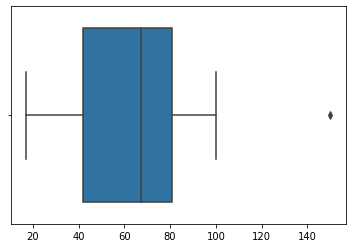

In [12]:
sns.boxplot(salarys)
plt.show

In [13]:
lowest = 42 - 39 * 1.5
highest = 81 + 39 * 1.5
for salary in salarys:
    if salary < lowest or salary >  highest:
        print(salary)

150


# TASK_3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [14]:
# вероятность попадания на факультет
Pa = 0.25
Pb = 0.25
Pc = 0.5
# веротянотсь сдать экзамен на факултете
Paex = 0.8
Pbex = 0.7
Pcex = 0.9

PA = (Pa * Paex) / (Pa * Paex + Pb * Pbex + Pc * Pcex)
PB = (Pb * Pbex) / (Pa * Paex + Pb * Pbex + Pc * Pcex)
PC = (Pc * Pcex) / (Pa * Paex + Pb * Pbex + Pc * Pcex)
print(f'A = {PA}, B = {PB}, C = {PC}')

A = 0.24242424242424246, B = 0.21212121212121213, C = 0.5454545454545455
